# Project: Wrangling and Analyze Data

## Imports

In [267]:
#import necessary packages/libraries

import pandas as pd
import numpy as np
import regex as re
import requests
import matplotlib as plt
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline

##### 1. importing directly downloaded data (twitter_archive_enhanced.csv)

In [3]:
df_archive = pd.read_csv('twitter-archive.csv')
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)
#tweet_ids

2356

#### 2. Using Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
img = url.split('/')[-1]
img

'image-predictions.tsv'

In [6]:
response = requests.get(url)
response
#test to see code 200 for file availability


<Response [200]>

In [7]:
# Save content of the response gotten into a write binary file with name 'image-predictions.tsv'

with open(img, mode = 'wb') as file:
    file.write(response.content)

Reading the file into pandas Dataframe

In [8]:
df_image_pred = pd.read_csv(img, sep='\t')
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
np.nan

nan

#### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
consumer_key = 'code'
consumer_secret = 'code'
access_token = 'code'
access_secret = 'code'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True)


In [3]:
api

In [ ]:
'''
# Querying Twitter's API (for retweets and favotite data) for each tweet ID in the Twitter archive
count = 0
fails = {}
start = timer()
# To save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails)'''

In [4]:
auth

In [10]:

reaction = []
with open('tweet_json.txt', 'r') as file:
      for line in file:
        data = json.loads(line)
        reaction.append(data)
df_reaction = pd.DataFrame(reaction, columns=['id', 'retweet_count', 'favorite_count'])

In [11]:
df_reaction.head(10) #Shows first 10 rows of the dataset

,id,retweet_count,favorite_count
0,892420643555336193,7009,33811
1,892177421306343426,5302,29330
2,891815181378084864,3481,22055
3,891689557279858688,7227,36940
4,891327558926688256,7762,35312
5,891087950875897856,2602,17812
6,890971913173991426,1664,10364
7,890729181411237888,15755,56870
8,890609185150312448,3622,24526
9,890240255349198849,6101,27966


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [12]:
#df_archive
#df_image_pred
df_reaction.info() #Quick info about number of values in each column, and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [13]:
df_reaction.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2471.671251,7055.090675
std,6.820795e+16,4185.675293,10963.696975
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,494.500000,1225.500000
50%,7.178418e+17,1149.000000,3050.000000
75%,7.986547e+17,2861.500000,8606.000000
max,8.924206e+17,70751.000000,144904.000000


In [28]:
df_reaction.sample(5) #ramdom sample of 5 entries at each run for visual assessment

,id,retweet_count,favorite_count
202,851591660324737024,3128,14977
1427,695409464418041856,3261,8014
1098,729854734790754305,1018,3719
1784,676776431406465024,1805,4533
312,833722901757046785,3003,19716


In [30]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_image_pred.sample(5) #ramdom sample of 5 entries at each run for visual assessment

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
884,698953797952008193,https://pbs.twimg.com/media/CbMuxV5WEAAIBjy.jpg,1,Italian_greyhound,0.382378,True,redbone,0.102255,True,shower_cap,0.076834,False
1406,770069151037685760,https://pbs.twimg.com/media/Cq_Vy9KWcAIUIuv.jpg,1,Boston_bull,0.414965,True,American_Staffordshire_terrier,0.286985,True,Staffordshire_bullterrier,0.114970,True
338,672239279297454080,https://pbs.twimg.com/media/CVRGDrsWsAAUWSF.jpg,1,pug,0.332536,True,French_bulldog,0.258124,True,bull_mastiff,0.120873,True
1181,738184450748633089,https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg,1,Bedlington_terrier,0.289471,True,standard_poodle,0.173685,True,Great_Pyrenees,0.157081,True


In [29]:
df_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [35]:
df_archive.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
817,770772759874076672,NaN,NaN,2016-08-30 23:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He's super h*ckin fluffy. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770772759...,11,10,Sebastian,None,None,None,None
488,813944609378369540,NaN,NaN,2016-12-28 03:08:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bruce. He never backs d...,7.902771e+17,4.196984e+09,2016-10-23 19:42:02 +0000,https://twitter.com/dog_rates/status/790277117...,11,10,Bruce,None,None,None,None


In [52]:
df_archive.text.sample(5) #retweet "RT @\D"


541     RT @dog_rates: This is Dave. He's currently in...
2333    This is an extremely rare horned Parthenon. No...
1403    Meet Miley. She's a Scandinavian Hollabackgirl...
2139    Awesome dog here. Not sure where it is tho. Sp...
2250    THE EYES 12/10\n\nI'm sorry. These are suppose...
Name: text, dtype: object

# Quality issues
1. Null/missing data

`df_archive` 
- lots of null values in 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' columns
- expanded_urls has 2297 values **But not cleaned**

2. Duplicated values


3. Wrong data types

`df_archive` 
- tweet_id int64
- timestamp  object 


4. None instead of NaN in dog stages 'doggo', 'floofer', 'pupper', 'puppo'



5. Irrelevant columns: to be deleted

`df_archive`
- 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'

6. inconsistent header

"id", "tweet_id"


7. A number of retweets along with original tweets


8. Inconsistent ratings - denominators more than 10 as recognised in the special rating convention

### Tidiness issues
1. 4 dog stages 'doggo', 'floofer', 'pupper', 'puppo' in different columns

2. All three datasets in seperate data tables - should be in one

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [242]:
# Make copies of original pieces of data
df_archive_copy = df_archive.copy()
df_image_pred_copy = df_image_pred.copy()
df_reaction_copy = df_reaction.copy()

In [234]:
df_archive_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [56]:
df_archive_copy.info() #[df_archive_copy.source == np.nan].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [235]:
df_archive_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #1: Irrelevant columns: to be deleted

#### Define: Drop columns -- 
'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'

#### Code

In [243]:
dropped_col = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp']
df_archive_copy = df_archive_copy.drop(columns=dropped_col)

#### Test

In [244]:
df_archive_copy.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.356000e+03,2356.000000,2356.000000
mean,7.427716e+17,13.126486,10.455433
std,6.856705e+16,45.876648,6.745237
min,6.660209e+17,0.000000,0.000000
25%,6.783989e+17,10.000000,10.000000
50%,7.196279e+17,11.000000,10.000000
75%,7.993373e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


## Issue #2: Inconsistent ratings - denominators more than 10 as recognised in the special rating convention

### Define: Extract ratings  from "text" column

#### Code

In [245]:

df_archive_copy['rating_denominator'] = df_archive_copy['text'].str.extract('.*?(\d{1,3}\/10)', expand=False).str.split('/').str[1]
df_archive_copy['rating_numerator'] = df_archive_copy['text'].str.extract('.*?(\d{1,3}\/10)', expand=False).str.split('/').str[0]

#### Test

In [246]:
df_archive_copy.sample(12) #check samples of the extracted values

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
913,757400162377592832,2016-07-25 02:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",She walks herself up and down the train to be ...,https://twitter.com/dog_rates/status/757400162...,13,10,None,None,None,None,None
154,862096992088072192,2017-05-10 00:08:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send perfectly...,https://twitter.com/dog_rates/status/862096992...,13,10,None,None,None,None,None
644,793180763617361921,2016-10-31 20:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Newt. He's a strawberry. 11/10 https:/...,https://twitter.com/dog_rates/status/793180763...,11,10,Newt,None,None,None,None
1496,692530551048294401,2016-01-28 02:12:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cody. He's been to like 80 countr...,https://twitter.com/dog_rates/status/692530551...,10,10,Cody,None,None,None,None
1175,720043174954147842,2016-04-13 00:17:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Neptune. He's a Snowy Swiss Mountain F...,https://twitter.com/dog_rates/status/720043174...,11,10,Neptune,None,None,None,None
990,748705597323898880,2016-07-01 02:31:39 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",#BarkWeek is getting rather heckin terrifying ...,https://twitter.com/dog_rates/status/748705597...,13,10,None,None,None,None,None
2197,668826086256599040,2015-11-23 16:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Banditt. He is a brown LaBeouf retriev...,https://twitter.com/dog_rates/status/668826086...,10,10,Banditt,None,None,None,None
93,874057562936811520,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",https://twitter.com/dog_rates/status/874057562...,12,10,None,None,None,None,None
980,749774190421639168,2016-07-04 01:17:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Benebop Cumberplop. 12/1...,https://twitter.com/dog_rates/status/749774190...,12,10,Lucy,None,None,None,None
1203,716285507865542656,2016-04-02 15:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephanus. She stays woke. 12/10 https...,https://twitter.com/dog_rates/status/716285507...,12,10,Stephanus,None,None,None,None


In [259]:
df_archive_copy.describe()

,tweet_id
count,2.356000e+03
mean,7.427716e+17
std,6.856705e+16
min,6.660209e+17
25%,6.783989e+17
50%,7.196279e+17
75%,7.993373e+17
max,8.924206e+17


## Issue #3: None instead of NaN in dog stages 'doggo', 'floofer', 'pupper', 'puppo'

### Define Replace None with numpy's not a number

In [247]:
stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in stages:
    df_archive_copy[stage] = df_archive_copy[stage].replace('None',np.nan)

In [261]:
df_archive_copy.sample(3) #test

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
357,830173239259324417,2017-02-10 21:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Kyro. He's a Stratocumu...,https://twitter.com/dog_rates/status/809220051...,12,10,Kyro,NaN
1818,676593408224403456,2015-12-15 02:43:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,https://vine.co/v/eEQQaPFbgOY,11,10,None,pupper
1466,694342028726001664,2016-02-02 02:10:14 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",It's okay pup. This happens every time I liste...,https://vine.co/v/iJWKejYdLlh,11,10,None,NaN


## Issue #4: A number of retweets along with original tweets

### Define - Spool out the retweets from the text columns and drop them using the indices

In [285]:
#df_archive_copy[df_archive_copy.text == re'.*?(RT.@).*?')]
#df_archive_copy[df_archive_copy.text.str.contains('RT @'), :]
retweets = df_archive_copy.loc[df_archive_copy.text.str.contains('RT @'), :]
retweets.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
19,888202515573088257,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN
32,886054160059072513,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,https://twitter.com/dog_rates/status/886053434...,12,10,None,NaN


In [292]:
drop_index = list(retweets.index.values)
len(drop_index) #number of retweets

181

In [291]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2340 non-null   object
 6   rating_denominator  2340 non-null   object
 7   name                2356 non-null   object
 8   dog_stage           380 non-null    object
dtypes: int64(1), object(8)
memory usage: 165.8+ KB


In [293]:
df_archive_copy = df_archive_copy.drop(drop_index, axis=0) #retweets dropped

In [294]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2159 non-null   object
 6   rating_denominator  2159 non-null   object
 7   name                2175 non-null   object
 8   dog_stage           344 non-null    object
dtypes: int64(1), object(8)
memory usage: 169.9+ KB


## Issue #5: Inconsistent header

### Define: rename id to tweet_id

### Code

In [297]:
df_reaction_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [309]:
df_reaction_copy.rename(columns = {'id': 'tweet_id'}, inplace=True)

# Tidiness

### Issue #1: Four dog stages 'doggo', 'floofer', 'pupper', 'puppo' in different columns\

### Define: Merge the four stages into one and drop them after it's been merged

In [249]:
df_archive_copy.columns[0:]

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [250]:
df_archive_copy['dog_stage'] = df_archive_copy[df_archive_copy.columns[8:]].apply(
    lambda x: ','.join(x.dropna().astype(str)), axis=1)

In [251]:
df_archive_copy.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [252]:
#replace "''" with np.nan
df_archive_copy['dog_stage'] = df_archive_copy['dog_stage'].replace('',np.nan)


In [260]:
df_archive_copy.dog_stage.unique() #test

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [254]:
#delete columns after merging
df_archive_copy.drop(["doggo","floofer","pupper","puppo"], axis=1, inplace=True)

In [295]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2159 non-null   object
 6   rating_denominator  2159 non-null   object
 7   name                2175 non-null   object
 8   dog_stage           344 non-null    object
dtypes: int64(1), object(8)
memory usage: 169.9+ KB


# Tidiness

### Issue #2: All three datasets in seperate data tables - should be in one

### Define: Join datasets with pandas concat

### Code

In [310]:
df_master = df_archive_copy.merge(df_image_pred_copy, 
                                  on = 'tweet_id', how='left').merge(df_reaction_copy,
                                                                     on = 'tweet_id', how='left')


In [311]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2159 non-null   object 
 6   rating_denominator  2159 non-null   object 
 7   name                2175 non-null   object 
 8   dog_stage           344 non-null    object 
 9   jpg_url             1994 non-null   object 
 10  img_num             1994 non-null   float64
 11  p1                  1994 non-null   object 
 12  p1_conf             1994 non-null   float64
 13  p1_dog              1994 non-null   object 
 14  p2                  1994 non-null   object 
 15  p2_conf             1994 non-null   float64
 16  p2_dog

### Issue #4: Data types fixing

#### Define

### Code

- 0   tweet_id   to str  
 - 1   timestamp  to 
-  4   expanded_urls       2117 non-null   object 
-  5   rating_numerator    to int 
-  6   rating_denominator  to int 
 
 
-  11  p1                  1994 non-null   object 
 
-  12  p1_conf             1994 non-null   float64
-  13  p1_dog              1994 non-null   object 
-  14  p2                  1994 non-null   object 
-  15  p2_conf             1994 non-null   float64
-  16  p2_dog              1994 non-null   object 
-  17  p3                  1994 non-null   object 
-  18  p3_conf             1994 non-null   float64
-  19  p3_dog              1994 non-null   object

In [319]:
df_master.tweet_id = df_master.tweet_id.astype(str)
df_master.timestamp = pd.to_datetime(df_master.timestamp)
df_master.rating_numerator = df_master.rating_numerator.astype(float)
df_master.rating_denominator = df_master.rating_denominator.astype(float)



In [320]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2159 non-null   float64            
 6   rating_denominator  2159 non-null   float64            
 7   name                2175 non-null   object             
 8   dog_stage           344 non-null    object             
 9   jpg_url             1994 non-null   object             
 10  img_num             1994 non-null   float64            
 11  p1                  1994 non-null   object             
 12  p1_conf             1994 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [321]:
df_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Visualization

In [325]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7009.0,33811.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5302.0,29330.0


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2159 non-null   float64
 6   rating_denominator  2159 non-null   float64
 7   name                2175 non-null   object 
 8   dog_stage           344 non-null    object 
 9   jpg_url             1994 non-null   object 
 10  img_num             1994 non-null   float64
 11  p1                  1994 non-null   object 
 12  p1_conf             1994 non-null   float64
 13  p1_dog              1994 non-null   object 
 14  p2                  1994 non-null   object 
 15  p2_conf             1994 non-null   float64
 16  p2_dog

In [344]:
def scatter_plotter(xaxis,yaxis,titl):
    df.plot(kind='scatter', x=xaxis,y=yaxis, title=titl);

In [345]:
df.retweet_count

0       7009.0
1       5302.0
2       3481.0
3       7227.0
4       7762.0
         ...  
2170      37.0
2171     115.0
2172      36.0
2173      39.0
2174     423.0
Name: retweet_count, Length: 2175, dtype: float64

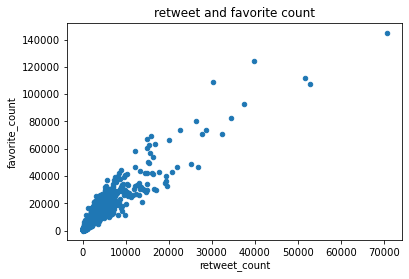

In [347]:
scatter_plotter('retweet_count','favorite_count', 'retweet and favorite count')

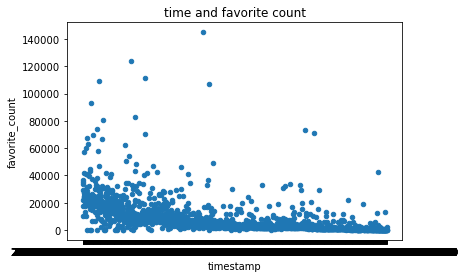

In [355]:
#trying to show what time particular time of the day the audience interact with the posts
scatter_plotter('timestamp','favorite_count', 'time and favorite count')

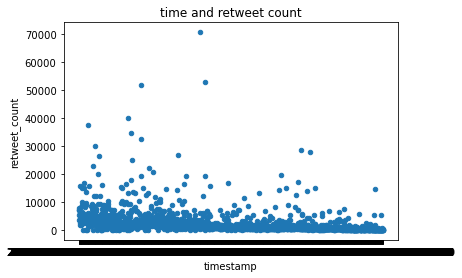

In [356]:
#trying to show what time particular time of the day the audience interact with the posts
scatter_plotter('timestamp','retweet_count', 'time and retweet count')

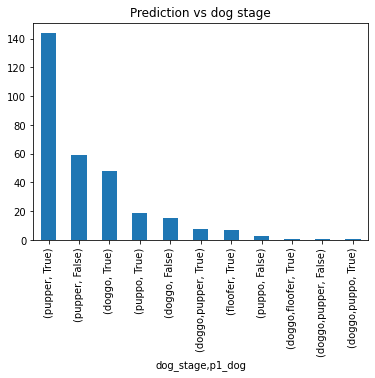

In [365]:
df[['dog_stage','p1_dog']].value_counts().plot(kind='bar', title='Prediction vs dog stage'); #To see the popular dog stage in the data set

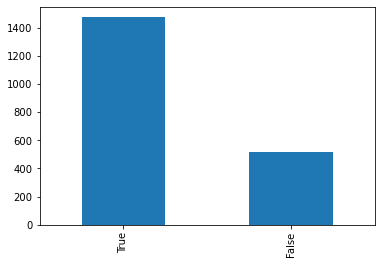

In [370]:
df['p1_dog'].value_counts().plot(kind='bar');

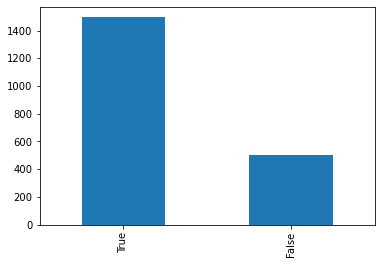

In [371]:
df['p2_dog'].value_counts().plot(kind='bar');

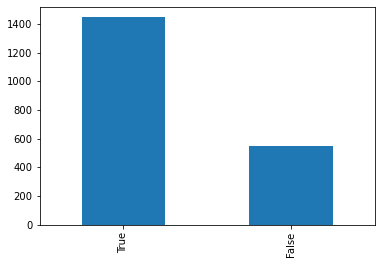

In [372]:

df['p3_dog'].value_counts().plot(kind='bar');

### Insights:
1. Majority of the dogs rated are in the 'pupper stage', followed weakly by the 'doggo' and 'puppo'


2. retweet and favorite count are not significantly influenced by the time of post


3. Most of the "p1" predictions for the stage "pupper" came out to be true


4. Other preductions viz. p2_dog, p3_dog both have similar effectiveness as the p1_dog from the distribution of True and False

### Limitations
- Data set was collated over a long period of time which might question its accuracy. 
- There were instance of missing data some of which were dropped hence a question of representativeness.